# Feature Extraction

변수 추출

Feature Extraction은 고차원 데이터 분석 시에 모델링에 사용할 변수를 추출하는 방법입니다. Feature Selection과 다른 점은 존재하는 변수 중에서 중요한 변수들을 선택하여 차원을 축소하는 것이 아니라, 저차원으로 맵핑한 새로운 변수를 통해 차원을 줄인다는 것입니다.

## Linear Method (선형 방식)

### Unsupervised Method
#### Principal Component Analysis(PCA: 주성분 분석)

PCA 는 고차원 데이터의 Variance 는 최대한 보존하면서 서로 직교하는 새 축을 찾아 데이터를 이 축상에 맵핑하여 새로운 저차원 변수를 만들어 차원 축소를 합니다. 비지도 학습 방법이어서 Label 이 없는 데이터에 대해서도 사용이 가능합니다.

만약 데이터에 이상치가 많이 포함되어 있다고 판단되면 whiten = True 로 놓는 것이 모델 성능 향상에 도움이 될 수 있습니다.


**whiten : bool, optional (default False)**
* When True (False by default) the components_ vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.
* Whitening will remove some information from the transformed signal (the relative variance scales of the components) but can sometime improve the predictive accuracy of the downstream estimators by making their data respect some hard-wired assumptions.

PCA를 통해 n 차원으로 차원을 축소하게 될 경우, explaned variance ratio 를 통해 얼마나 많은 데이터가 축소된 차원을 따르는지 알 수 있습니다. 예를 들어 10차원 데이터를 PCA를 통해 2차원으로 축소하였고, PCA의 explaned_variance_ratio_ 배열 값의 합이 0.95 라면, 차원은 2차원으로 축소되었지만 여전히 95% 의 데이터가 이 축소된 차원으로 셜명될 수 있음을 나타냅니다. 

PCA 를 통해 축소할 차원의 수를 정의 할때, 이 방식은 좋은 지표가 되기에, PCA 함수에서도 이 기능을 지원합니다. 

**n_components: int, float, None or str**

* int: 지정한 차원으로 축소 
* float: 0.0 ~ 1.0, explaned variance ratio 의 합이 해당 값이 될때 까지 차원 축소 

#### Incremental PCA (IPCA: 증분 주성분 분석)

Incremental principal component analysis (IPCA) 는 데이터 셋이 너무 커서 메모리 상에서 PCA를 돌릴 수 없을 때 사용합니다. 

IPCA는 데이터 셋의 크기와 독립적인 양의 메모리를 사용합니다. batch size 조절을 통해서 사용되는 메모리 양을 제어 할 수 있습니다.



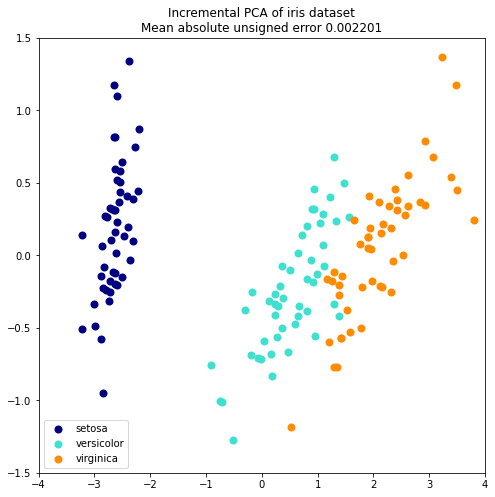

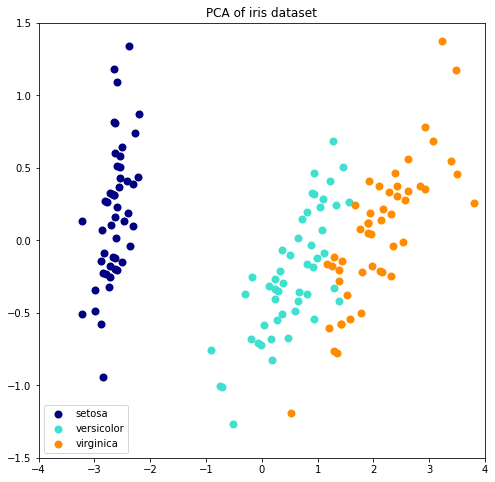

In [2]:
# Authors: Kyle Kastner
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
y = iris.target

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ["navy", "turquoise", "darkorange"]

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=color,
            lw=2,
            label=target_name,
        )

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error %.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()



### Supervised Method
#### Linear Discriminant Analysis(LDA)

고차원 데이터의 Classfication 문제에서 데이터의 차원을 줄이는데 사용할 수 있습니다. LDA 는 Class 사이의 분류를 최대화하는 linear subspace 구성하여 projection 함으로써 차원을 줄이게 됩니다.

#### Neighborhood Components Analysis(NCA)

데이터의 독립변수가 종속변수와 거리 기반의 상관관계를 보이는 데이터에 대해서, 차원을 축소해 줌으로써 Neighbors 방식의 Classification 알고리즘의 정확도를 높이는데 사용할 수 있습니다.

scikit-learn ver: 0.24.2


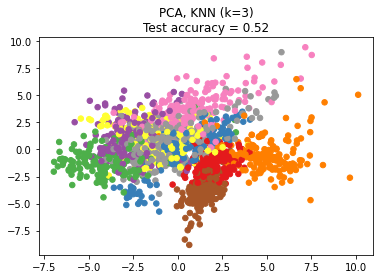

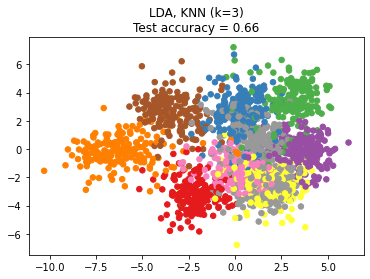

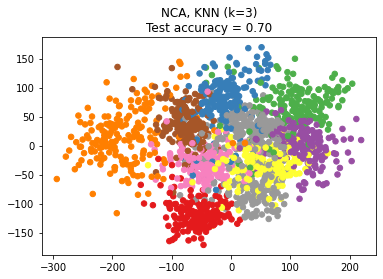

In [1]:
# 참조: https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html
# scikit-learn v0.21.2 이상 필요
# License: BSD 3 clause

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

print("scikit-learn ver: {}".format(sklearn.__version__))

n_neighbors = 3
random_state = 0

# Load Digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)

dim = len(X[0])
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set        
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
plt.show()

## Non-Linear Method (비선형 방식)

### Manifold Learning

Manifold는 고차원의 데이터를 잘 표현하는 subspace를 의미하며, Manifold Learning은 고차원 데이터에서 이런 Manifold을 찾는 것을 비선형 방식으로 접근힙니다. 

#### t-SNE

t-SNE 는 공간상의 유사도 계산에 t-분포의 조건부 확률 변수를 이용하여 계산합니다. 다른 전통 방식보다 좋은 성능을 보여줍니다.


In [29]:
# https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: BSD 3 clause (C) INRIA 2011

from sklearn.datasets import load_digits

digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30


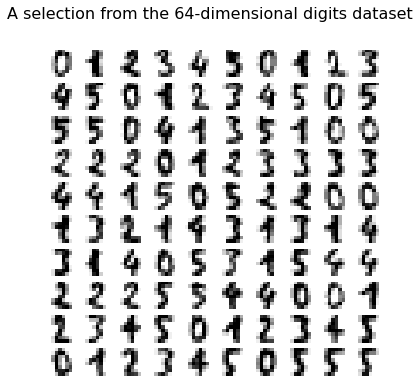

In [30]:

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)


In [31]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler


def plot_embedding(X, title, ax):
    X = MinMaxScaler().fit_transform(X)
    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

In [32]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

embeddings = {
    "Random projection embedding": SparseRandomProjection(
        n_components=2, random_state=42
    ),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Linear Discriminant Analysis embedding": LinearDiscriminantAnalysis(
        n_components=2
    ),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "Hessian LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="hessian"
    ),
    "LTSA LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="ltsa"
    ),
    "MDS embedding": MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2),
    "Random Trees embedding": make_pipeline(
        RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),
        TruncatedSVD(n_components=2),
    ),
    "Spectral embedding": SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embeedding": TSNE(
        n_components=2,
        init="pca",
        learning_rate=10,
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="pca", random_state=0
    ),
}

In [33]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing Hessian LLE embedding...
Computing LTSA LLE embedding...
Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embeedding...
Computing NCA embedding...


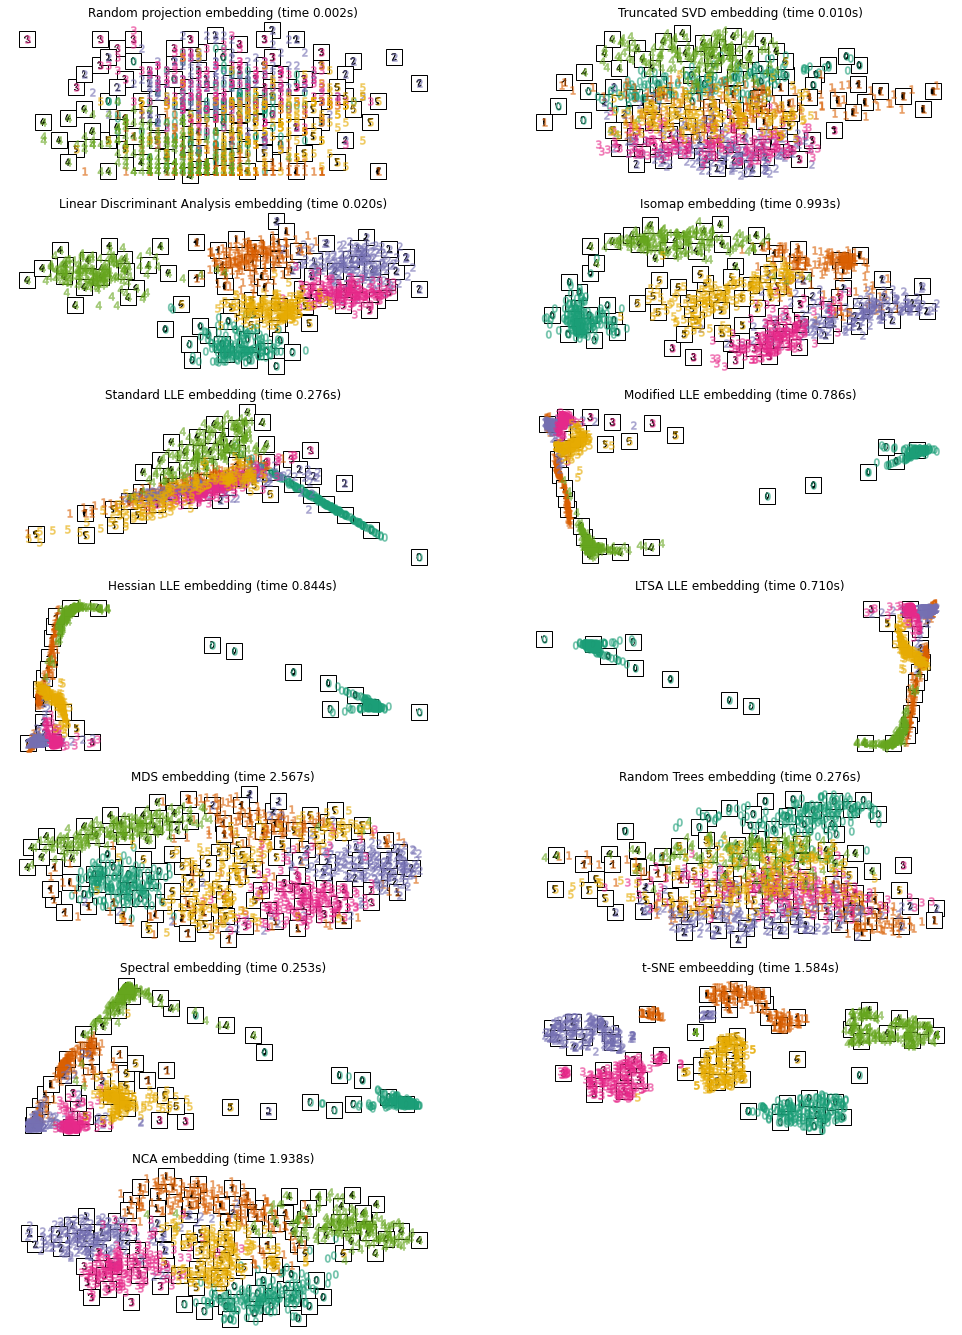

In [34]:
from itertools import zip_longest

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(17, 24))

for name, ax in zip_longest(timing, axs.ravel()):
    if name is None:
        ax.axis("off")
        continue
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title, ax)

plt.show()